In [ ]:
***** ENSEMBLE MODELS ******
--> TWO TYPES MODELS
   -BAGGING
   -BOOSTING

BAGGING  -->
BOOSTING  --> it converts Learn learning alg to predict analysis

EX:- xgboost,adadboost and 

In [ ]:
**** XGBOOST ****

-- EXTREAM GRADIENT BOOSTING MACHINE
-- XGBOOST IS A DECISION TREE BASED ENSEMBLE LEARNING METHOD WHICH USE A GRADIENT BOOST FRAMEWORK
-- IT CAN ALSO USED BOTH REGRESSION AND CLASSIFICATION PROBLEMS


**** 

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler

In [114]:
heart = pd.read_csv('heart_disease.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [115]:
heart.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [116]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [117]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [118]:
heart_isnull = heart.isnull()

In [119]:
print(heart_isnull.sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [120]:
heart.dropna(inplace = True)
print(heart.isnull().sum())
print(heart.shape)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
(299, 16)


In [121]:
heart["sex"]=encoder.fit_transform(heart["sex"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'Female', 1: 'Male'}

In [131]:
heart["dataset"]=encoder.fit_transform(heart["dataset"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'Cleveland', 1: 'Hungary', 2: 'VA Long Beach'}

In [126]:
heart["cp"]=encoder.fit_transform(heart["cp"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'asymptomatic',
 1: 'atypical angina',
 2: 'non-anginal',
 3: 'typical angina'}

In [128]:
heart["trestbps"]=encoder.fit_transform(heart["trestbps"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 94.0,
 1: 100.0,
 2: 101.0,
 3: 102.0,
 4: 104.0,
 5: 105.0,
 6: 106.0,
 7: 108.0,
 8: 110.0,
 9: 112.0,
 10: 114.0,
 11: 115.0,
 12: 117.0,
 13: 118.0,
 14: 120.0,
 15: 122.0,
 16: 123.0,
 17: 124.0,
 18: 125.0,
 19: 126.0,
 20: 128.0,
 21: 129.0,
 22: 130.0,
 23: 132.0,
 24: 134.0,
 25: 135.0,
 26: 136.0,
 27: 138.0,
 28: 140.0,
 29: 142.0,
 30: 144.0,
 31: 145.0,
 32: 146.0,
 33: 148.0,
 34: 150.0,
 35: 152.0,
 36: 154.0,
 37: 155.0,
 38: 156.0,
 39: 158.0,
 40: 160.0,
 41: 164.0,
 42: 165.0,
 43: 170.0,
 44: 172.0,
 45: 174.0,
 46: 178.0,
 47: 180.0,
 48: 192.0,
 49: 200.0}

In [129]:
heart["chol"]=encoder.fit_transform(heart["chol"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 100.0,
 1: 126.0,
 2: 131.0,
 3: 141.0,
 4: 149.0,
 5: 157.0,
 6: 160.0,
 7: 164.0,
 8: 166.0,
 9: 167.0,
 10: 168.0,
 11: 169.0,
 12: 172.0,
 13: 174.0,
 14: 175.0,
 15: 176.0,
 16: 177.0,
 17: 178.0,
 18: 180.0,
 19: 182.0,
 20: 183.0,
 21: 184.0,
 22: 185.0,
 23: 186.0,
 24: 187.0,
 25: 188.0,
 26: 192.0,
 27: 193.0,
 28: 195.0,
 29: 196.0,
 30: 197.0,
 31: 198.0,
 32: 199.0,
 33: 200.0,
 34: 201.0,
 35: 203.0,
 36: 204.0,
 37: 205.0,
 38: 206.0,
 39: 207.0,
 40: 208.0,
 41: 209.0,
 42: 210.0,
 43: 211.0,
 44: 212.0,
 45: 213.0,
 46: 214.0,
 47: 215.0,
 48: 216.0,
 49: 217.0,
 50: 218.0,
 51: 219.0,
 52: 220.0,
 53: 221.0,
 54: 222.0,
 55: 223.0,
 56: 224.0,
 57: 225.0,
 58: 226.0,
 59: 227.0,
 60: 228.0,
 61: 229.0,
 62: 230.0,
 63: 231.0,
 64: 232.0,
 65: 233.0,
 66: 234.0,
 67: 235.0,
 68: 236.0,
 69: 237.0,
 70: 239.0,
 71: 240.0,
 72: 241.0,
 73: 242.0,
 74: 243.0,
 75: 244.0,
 76: 245.0,
 77: 246.0,
 78: 247.0,
 79: 248.0,
 80: 249.0,
 81: 250.0,
 82: 252.0,
 83: 253.0,
 8

In [130]:
heart["fbs"]=encoder.fit_transform(heart["fbs"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: False, 1: True}

In [136]:
heart["age"]=encoder.fit_transform(heart["age"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40}

In [138]:
heart["restecg"]=encoder.fit_transform(heart["restecg"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'lv hypertrophy', 1: 'normal', 2: 'st-t abnormality'}

In [140]:
heart["exang"]=encoder.fit_transform(heart["exang"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: False, 1: True}

In [141]:
heart["oldpeak"]=encoder.fit_transform(heart["oldpeak"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 0.0,
 1: 0.1,
 2: 0.2,
 3: 0.3,
 4: 0.4,
 5: 0.5,
 6: 0.6,
 7: 0.7,
 8: 0.8,
 9: 0.9,
 10: 1.0,
 11: 1.1,
 12: 1.2,
 13: 1.3,
 14: 1.4,
 15: 1.5,
 16: 1.6,
 17: 1.8,
 18: 1.9,
 19: 2.0,
 20: 2.1,
 21: 2.2,
 22: 2.3,
 23: 2.4,
 24: 2.5,
 25: 2.6,
 26: 2.8,
 27: 2.9,
 28: 3.0,
 29: 3.1,
 30: 3.2,
 31: 3.4,
 32: 3.5,
 33: 3.6,
 34: 3.8,
 35: 4.0,
 36: 4.2,
 37: 4.4,
 38: 5.6,
 39: 6.2}

In [143]:
heart["slope"]=encoder.fit_transform(heart["slope"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'downsloping', 1: 'flat', 2: 'upsloping'}

In [144]:
heart["ca"]=encoder.fit_transform(heart["ca"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0}

In [145]:
heart["thal"]=encoder.fit_transform(heart["thal"])
play_te=dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
play_te

{0: 'fixed defect', 1: 'normal', 2: 'reversable defect'}

In [146]:
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,dateset
0,1,29,1,0,3,31,65,1,0,150.0,0,22,0,0,0,0,0
1,2,33,1,0,0,40,112,0,0,108.0,1,15,1,3,1,2,0
2,3,33,1,0,0,14,61,0,0,129.0,1,25,1,2,2,1,0
3,4,3,1,0,2,22,81,0,1,187.0,0,32,0,0,1,0,0
4,5,7,0,0,1,22,36,0,0,172.0,0,14,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,34,1,0,0,30,27,1,1,141.0,0,31,1,2,2,2,0
300,301,23,1,0,0,22,2,0,1,115.0,1,12,1,1,2,3,0
301,302,23,0,0,1,22,68,0,0,174.0,0,0,1,1,1,1,0
508,509,13,1,1,0,34,58,0,1,98.0,1,15,1,0,2,1,1


In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
model = DecisionTreeClassifier()

In [154]:
model.fit(x,y)

DecisionTreeClassifier()

In [155]:
# Access  the tree attributes
tree_=model.tree_
root_node =0  # as root node with index will be 0
feature_names = x.columns
# to get the feature indecx of the root node'
root_feature_index = tree_.feature[root_node]
# to get feature name from the original value
root_feature_name=feature_names[root_feature_index]

In [156]:
print("Index is", root_feature_index)
print("Feature Name is",root_feature_name)
print("Root Node Impurity is ",tree_.impurity[root_node])

Index is 4
Feature Name is cp
Root Node Impurity is  0.6492768537264684


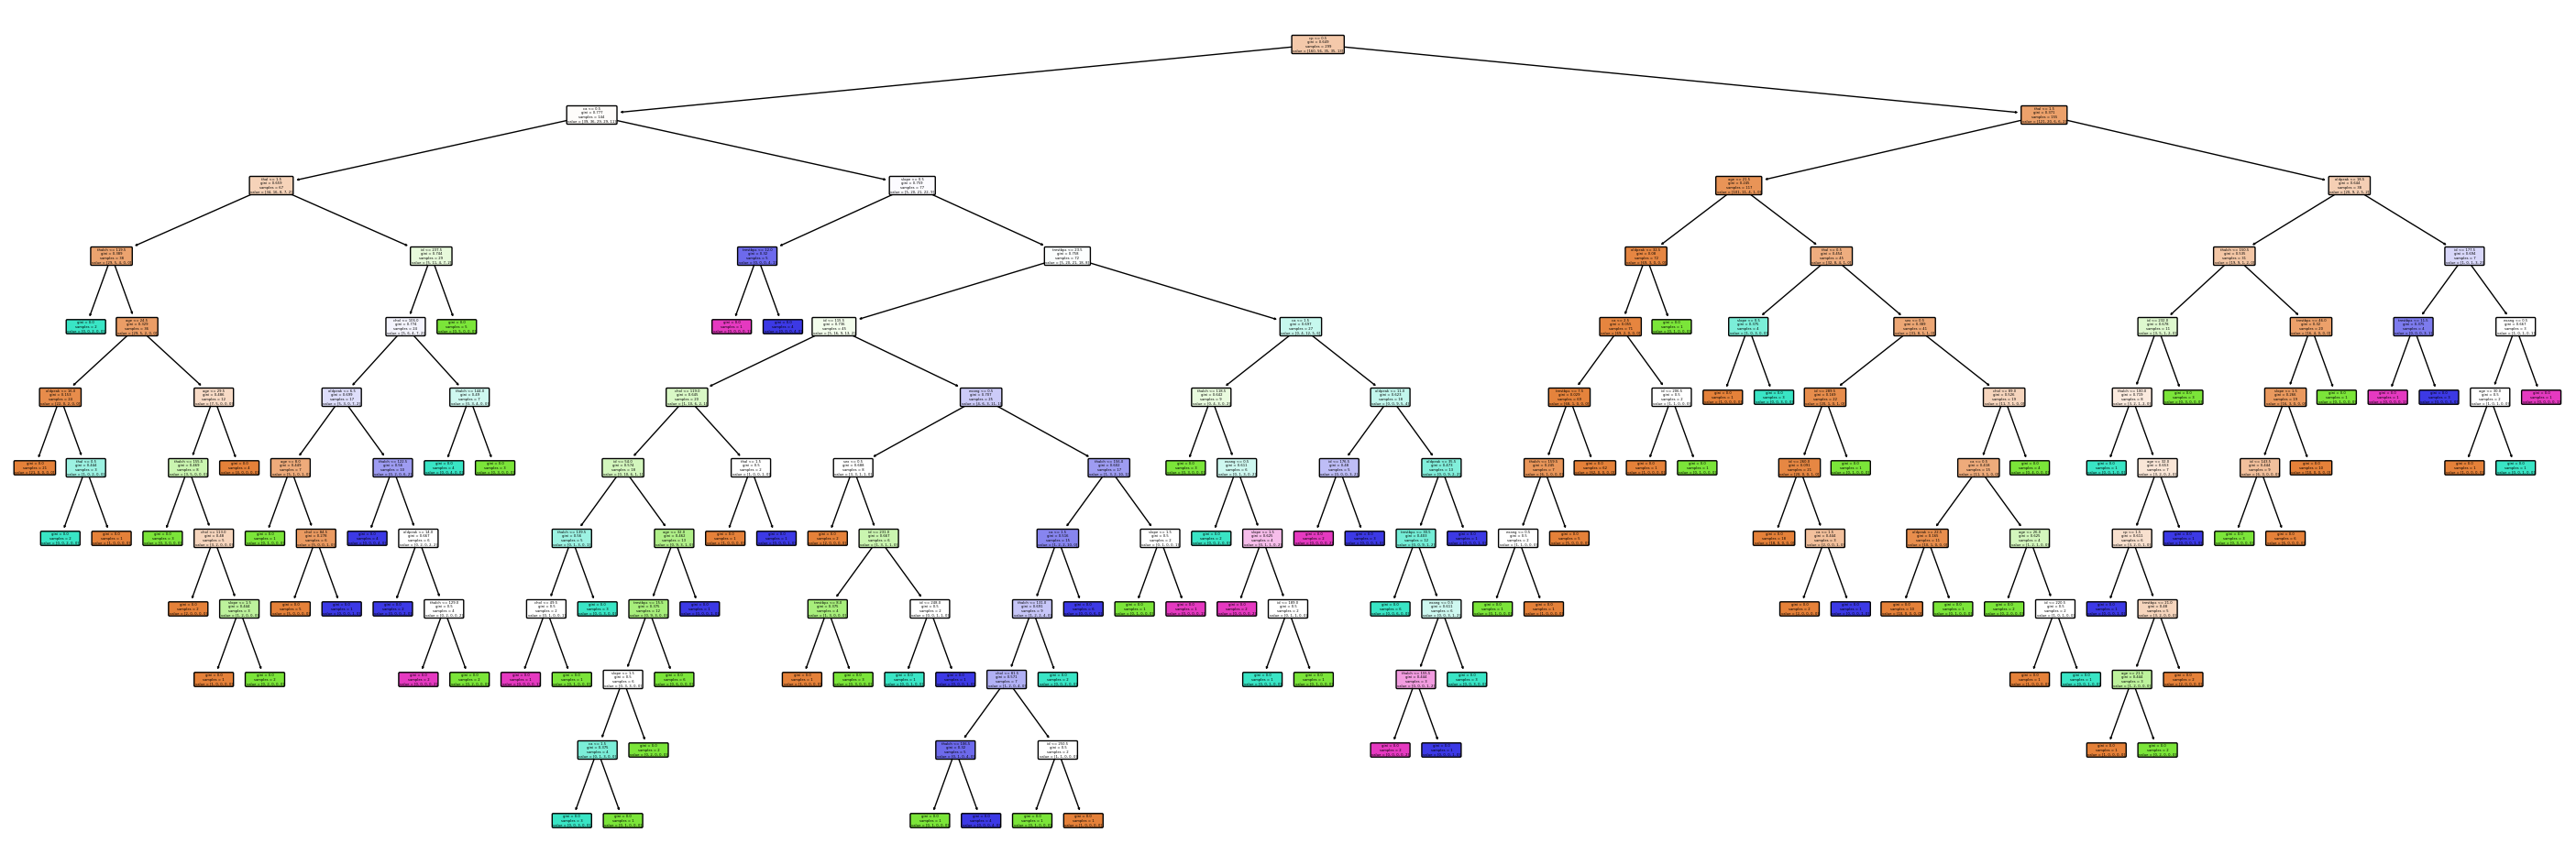

In [159]:
# visualize decision trees
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(36,12))
tree.plot_tree(model,feature_names=x.columns,filled=True,rounded=True)
plt.show()

In [172]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2


In [163]:
x = heart.drop('num',axis=1)
y=heart['num']

In [164]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [167]:
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.fit_transform(x_test)

In [168]:
model = RandomForestClassifier()

In [169]:
k=5
kf = KFold(n_splits = k, shuffle = True, random_state = 42)
param_grid = {'n_estimators':[100,200,300],'max_depth':[5,7,9],'min_samples_split':[2,5,10],
              'max_features':['sqrt','log2']}

In [170]:
grid_search = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = kf,n_jobs=-1,
                          verbose = 4,scoring = 'accuracy')
grid_search.fit(x_train_scaled,y_train)

print('Best Max_Depth:',grid_search.best_params_)
print('Best Accuracy:',grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Max_Depth: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.5986868686868687


In [171]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    int32  
 3   dataset   299 non-null    int32  
 4   cp        299 non-null    int32  
 5   trestbps  299 non-null    int64  
 6   chol      299 non-null    int64  
 7   fbs       299 non-null    int32  
 8   restecg   299 non-null    int32  
 9   thalch    299 non-null    float64
 10  exang     299 non-null    int32  
 11  oldpeak   299 non-null    int64  
 12  slope     299 non-null    int32  
 13  ca        299 non-null    int64  
 14  thal      299 non-null    int32  
 15  num       299 non-null    int64  
 16  dateset   299 non-null    int32  
dtypes: float64(1), int32(9), int64(7)
memory usage: 31.5 KB
